In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 125
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [2]:
df_pro = pd.read_excel(r"D:\ProgramData\data\excel_data\奶茶连锁店销售数据.xlsx",sheet_name = "产品表")
df_pro.head()

,产品分类ID,产品分类名称,产品ID,产品名称,单价
0,11,奶茶,1001,珍珠奶茶,25
1,11,奶茶,1002,椰果奶茶,23
2,11,奶茶,1003,香芋奶茶,20
3,12,冷饮,2001,养乐多,22
4,12,冷饮,2002,鲜橙汁,25


In [3]:
df_date = pd.read_excel(r"D:\ProgramData\data\excel_data\奶茶连锁店销售数据.xlsx",sheet_name="日期表")
df_date.head()

,日期,季度
0,2017-01-01,第1季度
1,2017-01-02,第1季度
2,2017-01-03,第1季度
3,2017-01-04,第1季度
4,2017-01-05,第1季度


In [4]:
df_store = pd.read_excel(r"D:\ProgramData\data\excel_data\奶茶连锁店销售数据.xlsx",sheet_name="门店表")
df_store.head()

,店铺ID,店铺名称,省份名称
0,101,哈尔滨市,黑龙江省
1,102,长春市,吉林省
2,103,吉林市,吉林省
3,104,沈阳市,辽宁省
4,105,大连市,辽宁省


In [5]:
df_sal = pd.read_excel(r"D:\ProgramData\data\excel_data\奶茶连锁店销售数据.xlsx",sheet_name="销售表")
df_sal.head()

,订单号,订单日期,店铺ID,产品ID,数量
0,N2000001,2017-01-01,111,3002,3
1,N2000002,2017-01-01,104,3002,2
2,N2000003,2017-01-01,110,3002,5
3,N2000004,2017-01-01,110,1001,8
4,N2000005,2017-01-01,104,2002,6


In [6]:
df_salfin = pd.merge(df_sal,df_pro,how="left",on="产品ID")
df_salfin.head()

,订单号,订单日期,店铺ID,产品ID,数量,产品分类ID,产品分类名称,产品名称,单价
0,N2000001,2017-01-01,111,3002,3,13,咖啡,卡布奇诺,21
1,N2000002,2017-01-01,104,3002,2,13,咖啡,卡布奇诺,21
2,N2000003,2017-01-01,110,3002,5,13,咖啡,卡布奇诺,21
3,N2000004,2017-01-01,110,1001,8,11,奶茶,珍珠奶茶,25
4,N2000005,2017-01-01,104,2002,6,12,冷饮,鲜橙汁,25


In [7]:
df_salfin["售价"] = df_salfin["数量"] * df_salfin["单价"]
df_salfin.head()

,订单号,订单日期,店铺ID,产品ID,数量,产品分类ID,产品分类名称,产品名称,单价,售价
0,N2000001,2017-01-01,111,3002,3,13,咖啡,卡布奇诺,21,63
1,N2000002,2017-01-01,104,3002,2,13,咖啡,卡布奇诺,21,42
2,N2000003,2017-01-01,110,3002,5,13,咖啡,卡布奇诺,21,105
3,N2000004,2017-01-01,110,1001,8,11,奶茶,珍珠奶茶,25,200
4,N2000005,2017-01-01,104,2002,6,12,冷饮,鲜橙汁,25,150


In [8]:
data_time = df_salfin.groupby("订单日期",as_index=False)["售价"].sum()
data_time.head()

,订单日期,售价
0,2017-01-01,3174
1,2017-01-02,3762
2,2017-01-03,3895
3,2017-01-04,5185
4,2017-01-05,4256


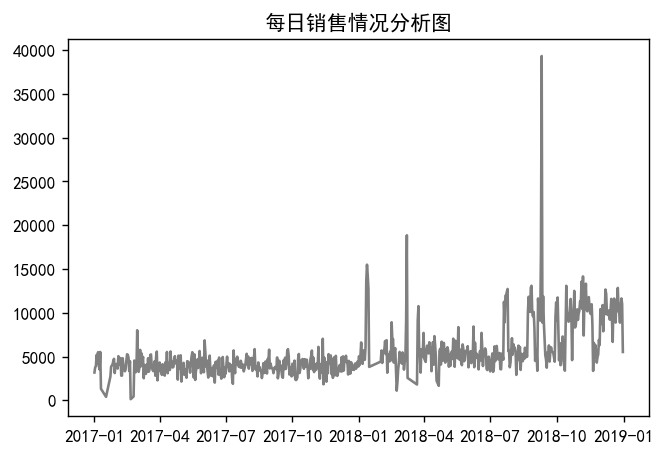

In [20]:
plt.plot(data_time.订单日期,data_time.售价,color = "gray")
plt.title('每日销售情况分析图')
plt.show()

In [10]:
data_time1 = data_time.set_index("订单日期",drop=True)
data_time1.head()

,售价
订单日期,
2017-01-01,3174
2017-01-02,3762
2017-01-03,3895
2017-01-04,5185
2017-01-05,4256


In [11]:
data_time_mon = data_time1.resample("M").sum().to_period()
data_time_mon.head()

,售价
订单日期,
2017-01,75664
2017-02,93987
2017-03,127514
2017-04,120713
2017-05,119746


In [17]:
data_time_mon["month"] = ['7-' + str(i) for i in range(1,13)] + ['8-' + str(i) for i in range(1,13)]
data_time_mon.head()

,售价,month
订单日期,,
2017-01,75664,7-1
2017-02,93987,7-2
2017-03,127514,7-3
2017-04,120713,7-4
2017-05,119746,7-5


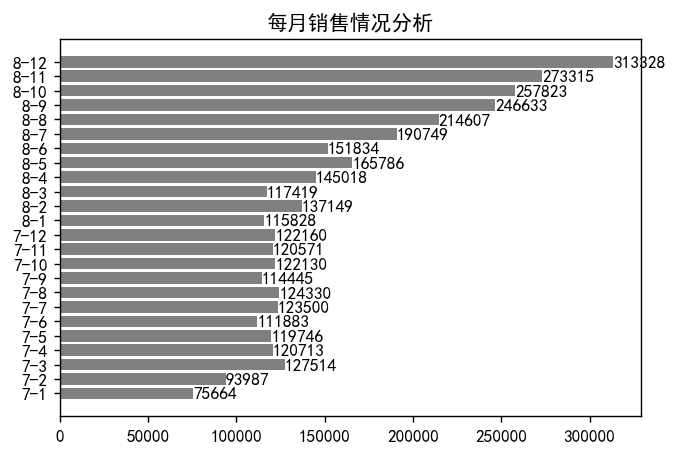

In [22]:
bar = plt.barh(data_time_mon.month,data_time_mon.售价,color = 'gray')
plt.bar_label(bar)

plt.title('每月销售情况分析')
plt.show()